In [8]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers

from nd_mlp_mixer import NdClassifier, NdAutoencoder

In [1]:
# Load the data
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images, test_images = train_images.astype("float32"), test_images.astype("float32")
height, width = train_images.shape[-2:]
num_classes = 10

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
nd_mixer_6 (NdMixer)         (None, 28, 28)            3248      
_________________________________________________________________
residual_layers_1 (ResidualL (None, 28, 28)            12996     
_________________________________________________________________
nd_mixer_11 (NdMixer)        (None, 1, 28)             1655      
_________________________________________________________________
flatten_1 (Flatten)          (None, 28)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                290       
Total params: 18,189
Trainable params: 18,189
Non-trainable params: 0
_______________________________________________________

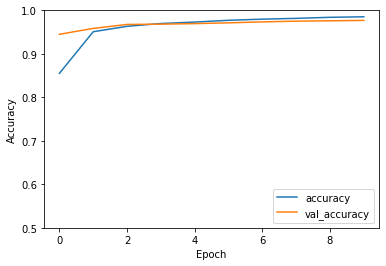

In [6]:
"Train a small NDClassifier on MNIST."

num_mix_layers = 4
in_shape = (height, width)
repr_shape = (height, width)
out_shape = (1, 28)

model = NdClassifier(in_shape, repr_shape, out_shape, num_mix_layers, num_classes)

print(model.summary())
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, batch_size=64, epochs=10, 
                    validation_data=(test_images, test_labels))

# PLOTS
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([.5, 1])
plt.legend(loc='lower right')
plt.show()

In [16]:
"Train a small NdAutoencoder on MNIST."
in_shape = (height, width)
repr_shape = (14, 14)
num_mix_layers = 2

model = NdAutoencoder(in_shape, repr_shape, num_mix_layers)
print(model.summary())

model.compile(optimizer='adam',
              loss='mse',
              metrics=[tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(train_images, train_images, batch_size=64, epochs=4, 
                    validation_data=(test_images, test_images))

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
nd_mixer_42 (NdMixer)        (None, 14, 14)            1232      
_________________________________________________________________
residual_layers_7 (ResidualL (None, 14, 14)            1682      
_________________________________________________________________
nd_mixer_45 (NdMixer)        (None, 28, 28)            2464      
Total params: 5,378
Trainable params: 5,378
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/4
938/938 [==============================] - 8s 9ms/step - loss: 0.1010 - root_mean_squared_error: 0.3103 - val_loss: 0.0268 - val_root_mean_squared_error: 0.1638
Epoch 2/4
938/938 [==============================] - 8s 9ms/step - loss: 0.0229

313/313 - 1s - loss: 0.0074 - root_mean_squared_error: 0.0858


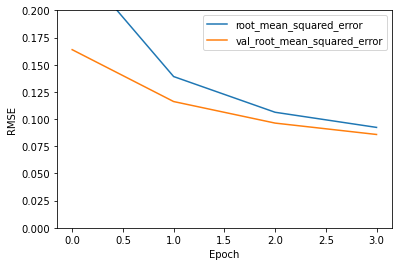

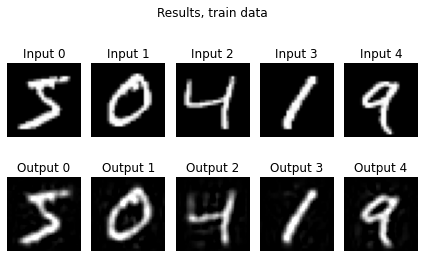

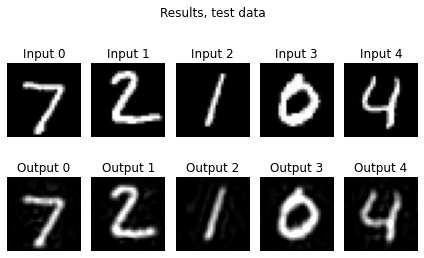

In [19]:
# PLOTS

plt.plot(history.history['root_mean_squared_error'], label='root_mean_squared_error')
plt.plot(history.history['val_root_mean_squared_error'], label = 'val_root_mean_squared_error')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.ylim([0, .2])
plt.legend()
test_loss, test_acc = model.evaluate(test_images,  test_images, verbose=2)
plt.show()

for i in range(5):
    im = train_images[i:i+1,...]

    plt.subplot(2, 5, i+1)
    plt.imshow(im[0,...], cmap='gray', vmin=0, vmax=1)
    plt.axis('off')
    plt.title(f'Input {i}')

    plt.subplot(2, 5, i+6)
    plt.imshow(model.predict(im)[0,...], cmap='gray', vmin=0, vmax=1)
    plt.axis('off')
    plt.title(f'Output {i}')

plt.suptitle("Results, train data")
plt.tight_layout()
plt.show()

for i in range(5):
    im = test_images[i:i+1,...]

    plt.subplot(2, 5, i+1)
    plt.imshow(im[0,...], cmap='gray', vmin=0, vmax=1)
    plt.axis('off')
    plt.title(f'Input {i}')

    plt.subplot(2, 5, i+6)
    plt.imshow(model.predict(im)[0,...], cmap='gray', vmin=0, vmax=1)
    plt.axis('off')
    plt.title(f'Output {i}')

plt.suptitle("Results, test data")
plt.tight_layout()
plt.show()